In [1]:
#Pandas & Visual Library
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/brandeefairnot/Library/CloudStorage/OneDrive-Personal/Documents/Instacart Basket Analysis/'

1) Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [3]:
#import file
df_fin = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers.pkl'))

In [4]:
#see all columns
pd.set_option('display.max_columns', None)

2) Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [5]:
df_fin2 = df_fin.drop(columns = ['First Name', 'Last Name', 'price_range_loc'])

3) Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [6]:
#define region
region = []
for State in df_fin2['State']:
    if State in ['New Jersey','Pennsylvania', 'New York', 'Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut']:
        region.append('Northeast')
    elif State in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
        region.append('Midwest')
    elif State in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
        region.append('South')
    else:
        region.append('West')

In [7]:
#new column 
df_fin2['Region'] = region

In [8]:
df_fin2.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,Type_of_Spender,Mean_Spending,order_freq_flag,Customer_Frequency,State,Age,Dependents,Family_Status,Income,Region
0,2539329,1,prior,1,2,8,NaN,196,1,0,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Average orders,10,New customer,Low Spender,6.367797,20.5,Regular customer,Alabama,31,3,married,40423,South
1,2398795,1,prior,2,3,7,15.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Average orders,10,New customer,Low Spender,6.367797,20.5,Regular customer,Alabama,31,3,married,40423,South
2,473747,1,prior,3,3,12,21.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Most orders,10,New customer,Low Spender,6.367797,20.5,Regular customer,Alabama,31,3,married,40423,South
3,2254736,1,prior,4,4,7,29.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy days,Average orders,10,New customer,Low Spender,6.367797,20.5,Regular customer,Alabama,31,3,married,40423,South
4,431534,1,prior,5,4,15,28.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy days,Most orders,10,New customer,Low Spender,6.367797,20.5,Regular customer,Alabama,31,3,married,40423,South


In [9]:
df_fin2['Region'].value_counts(dropna=False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: Region, dtype: int64

3B) Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [10]:
#subset
sub1 = df_fin2[["Mean_Spending", "Region"]]

In [11]:
#remove dups
sub1 = sub1.drop_duplicates()
print(sub1)

          Mean_Spending     Region
0              6.367797      South
59             3.980556    Midwest
131            8.372059      South
335            7.012683       West
540            8.137793      South
...                 ...        ...
32404760      14.050000       West
32404776      14.100000  Northeast
32404779      10.800000    Midwest
32404794       1.600000       West
32404819      13.285714       West

[164540 rows x 2 columns]


In [12]:
#groupby regions
sub1.groupby(by='Region')['Mean_Spending'].sum()

Region
Midwest      560767.862558
Northeast    385759.772027
South        763077.757288
West         555588.658075
Name: Mean_Spending, dtype: float64

In [13]:
#check values totals
sub1['Mean_Spending'].sum()

2265194.0499471882

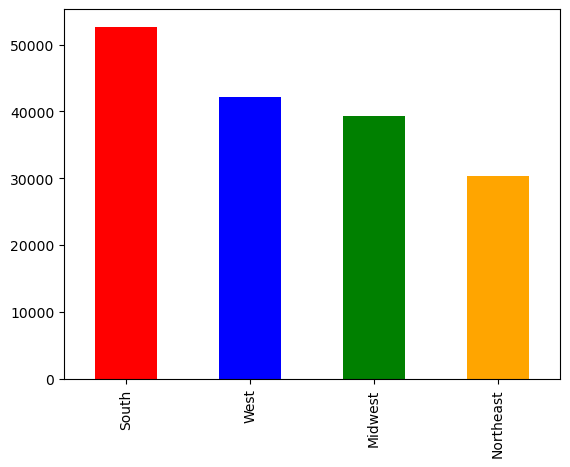

In [14]:
reg_bar = sub1['Region'].value_counts().plot.bar(color = ['red', 'blue', 'green', 'orange'])

In [15]:
#export
reg_bar.figure.savefig(os.path.join(path, '04 Analysis', 'region_spending_bar.png'))

4) The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [16]:
#define low activity customers by max order column
df_fin2.loc[df_fin2['max_order'] < 5, 'Customer_Activity'] = 'Low activity customer'
df_fin2.loc[df_fin2['max_order'] >= 5, 'Customer_Activity'] = 'High activity customer'

In [17]:
df_fin2.shape

(32404859, 31)

In [18]:
#check table 
df_fin2.head(5)

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,Type_of_Spender,Mean_Spending,order_freq_flag,Customer_Frequency,State,Age,Dependents,Family_Status,Income,Region,Customer_Activity
0,2539329,1,prior,1,2,8,NaN,196,1,0,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Average orders,10,New customer,Low Spender,6.367797,20.5,Regular customer,Alabama,31,3,married,40423,South,High activity customer
1,2398795,1,prior,2,3,7,15.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Average orders,10,New customer,Low Spender,6.367797,20.5,Regular customer,Alabama,31,3,married,40423,South,High activity customer
2,473747,1,prior,3,3,12,21.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Most orders,10,New customer,Low Spender,6.367797,20.5,Regular customer,Alabama,31,3,married,40423,South,High activity customer
3,2254736,1,prior,4,4,7,29.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy days,Average orders,10,New customer,Low Spender,6.367797,20.5,Regular customer,Alabama,31,3,married,40423,South,High activity customer
4,431534,1,prior,5,4,15,28.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy days,Most orders,10,New customer,Low Spender,6.367797,20.5,Regular customer,Alabama,31,3,married,40423,South,High activity customer


In [19]:
df_fin2['Customer_Activity'].value_counts()

High activity customer    30964564
Low activity customer      1440295
Name: Customer_Activity, dtype: int64

In [20]:
#index for drop
index1 = df_fin2[df_fin2['Customer_Activity'] == 'Low activity customer'].index

In [21]:
#drop Low activity customer rows
df_fin2.drop(index1,inplace=True)

In [22]:
#check to see if Low activity customer was removed
df_fin2['Customer_Activity'].value_counts()

High activity customer    30964564
Name: Customer_Activity, dtype: int64

5) Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles.

In [23]:
#create profile variable graph
sub2 = df_fin2[["user_id","department_id", "product_name", "Age", "Income", "Dependents", "Region"]]
#remove dups
sub2 = sub2.drop_duplicates()

In [24]:
sub2.head()

,user_id,department_id,product_name,Age,Income,Dependents,Region
0,1,7,Soda,31,40423,3,South
10,1,16,Organic Unsweetened Vanilla Almond Milk,31,40423,3,South
11,1,19,Original Beef Jerky,31,40423,3,South
21,1,19,Aged White Cheddar Popcorn,31,40423,3,South
23,1,17,XL Pick-A-Size Paper Towel Rolls,31,40423,3,South


In [25]:
#create profile variable graph of the top departments based on the number of dependents
d_d = sub2[['department_id', 'Dependents']]
d_d.head()

,department_id,Dependents
0,7,3
10,16,3
11,19,3
21,19,3
23,17,3


In [26]:
d_d2 = d_d.groupby('department_id').sum('Dependents')

In [27]:
#create profile variable graph or the top department per region
reg_dept = sub2[["Region", "department_id"]]
reg_dept 

,Region,department_id
0,South,7
10,South,16
11,South,19
21,South,19
23,South,17
...,...,...
32404798,South,7
32404810,West,5
32404819,West,13
32404824,West,13


6) Create an appropriate visualization to show the distribution of profiles.

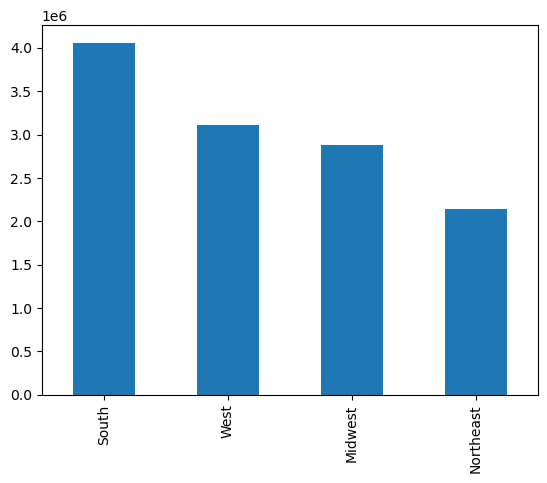

In [28]:
#which dept is popular for which region
reg_bar = reg_dept['Region'].value_counts().plot.bar()

In [30]:
#save chart
reg_bar.figure.savefig(os.path.join(path, '04 Analysis', 'finalregion_bar.png'))

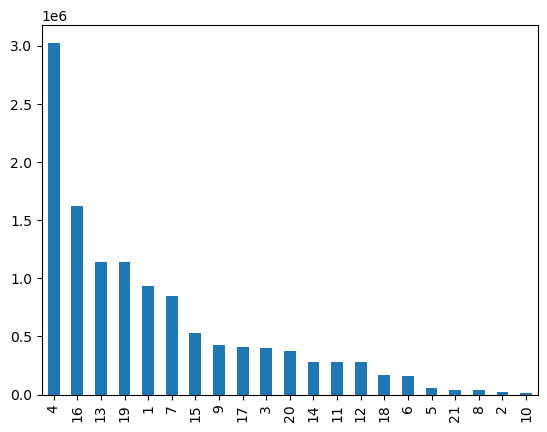

In [31]:
# top department based on the number of dependents 
depend_bar = d_d['department_id'].value_counts().plot.bar()

In [32]:
#save chart
depend_bar.figure.savefig(os.path.join(path, '04 Analysis', 'finaldependent_bar.png'))

7) Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [33]:
sub2.describe()

,user_id,department_id,Age,Income,Dependents
count,1.219688e+07,1.219688e+07,1.219688e+07,1.219688e+07,1.219688e+07
mean,1.029860e+05,1.023830e+01,4.949110e+01,1.003912e+05,1.502553e+00
std,5.944284e+04,6.208513e+00,1.849178e+01,4.317213e+04,1.118245e+00
min,1.000000e+00,1.000000e+00,1.800000e+01,2.590300e+04,0.000000e+00
25%,5.157100e+04,4.000000e+00,3.300000e+01,6.811700e+04,1.000000e+00
50%,1.026590e+05,1.100000e+01,4.900000e+01,9.729200e+04,2.000000e+00
75%,1.544530e+05,1.600000e+01,6.600000e+01,1.288080e+05,3.000000e+00
max,2.062090e+05,2.100000e+01,8.100000e+01,5.939010e+05,3.000000e+00


8) Compare your customer profiles with regions and departments. Can you identify a link between them?

The customer profiles showed that families in general bought more and people from southern regions bought more from instacart. This could be because southerns usually have larger families and the convenience of instacart makes 1 part of their day eaiser.  

In [34]:
#export file 
df_fin2.to_pickle(os.path.join(path, '02 Data','Prepared Data', '4.10final.pkl'))